# Applied Data Science Capstone - Week 4

## The Battle of the Neighborhoods - Week 2

### Segmentation and Clustering Neighborhoods of Frederiction, New Brunswick, Canada

#### IMPORT REQUIRED LIBRARIES



In [5]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# for webscraping import Beautiful Soup 
from bs4 import BeautifulSoup

import xml

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    certifi-2019.3.9           |           py36_0         149 KB  conda-forge
    conda-4.6.8                |           py36_0         876 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.18.1               |             py_0          51 KB  conda-forge
    openssl-1.1.1b             |       h14c3975_1         4.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.49-py_0

The follow

In [6]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://www.tourismfredericton.ca/sites/default/files/fredericton_new_brunswick_map.png")

In [7]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.unb.ca/fredericton/studentservices/_resources/img/sas/neighbourhoodmap.png")

#### DOWNLOAD & EXPLORE GeoJSON FILE

An internet link containing the geographical coordinates (latitude & longitude) of the neighbourhoods of Fredericton is accessed and explored in this section.

In [8]:
r = requests.get('https://opendata.arcgis.com/datasets/823d86e17a6d47808c6e4f1c2dd97928_0.geojson')
fredericton_geo = r.json()

neighborhoods_data = fredericton_geo['features']
neighborhoods_data[0]

{'type': 'Feature',
 'properties': {'FID': 1,
  'OBJECTID': 1,
  'Neighbourh': 'Fredericton South',
  'Shape_Leng': 40412.2767429,
  'Shape_Area': 32431889.0002},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-66.6193489311946, 45.8688925859664],
    [-66.5986068312843, 45.8934317575498],
    [-66.5998465063764, 45.8962889533894],
    [-66.6005561754508, 45.8987959122414],
    [-66.6007627879662, 45.9004150599189],
    [-66.6005112596866, 45.9020341603803],
    [-66.5993703992758, 45.9049409211054],
    [-66.5983912356161, 45.9066536507875],
    [-66.5950405196063, 45.9110977503182],
    [-66.5924713378938, 45.9137165396725],
    [-66.5975198697905, 45.9151915074375],
    [-66.6016161874861, 45.9165914405789],
    [-66.6063862416448, 45.9184662957134],
    [-66.6102310310608, 45.9201848572716],
    [-66.6193938469588, 45.9264149777787],
    [-66.6194297795702, 45.9243466803461],
    [-66.6206694546623, 45.9221345790227],
    [-66.6241459348118, 45.9181100781124],
    [-66.624963

In [9]:
g = requests.get('https://opendata.arcgis.com/datasets/6179d35eacb144a5b5fdcc869f86dfb5_0.geojson')
demog_geo = g.json()

demog_data = demog_geo['features']
demog_data[0]

{'type': 'Feature',
 'properties': {'FID': 1,
  'OBJECTID': 501,
  'DBUID': '1310024304',
  'DAUID': '13100243',
  'CDUID': '1310',
  'CTUID': '3200002.00',
  'CTNAME': '0002.00',
  'DBuid_1': '1310024304',
  'DBpop2011': 60,
  'DBtdwell20': 25,
  'DBurdwell2': 22,
  'Shape_Leng': 0.00746165241824,
  'Shape_Area': 2.81310751889e-06,
  'CTIDLINK': 3200002,
  'Shape__Area': 2.81310897700361e-06,
  'Shape__Length': 0.00746165464503067},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-66.634784212921, 45.9519239912381],
    [-66.6351046935752, 45.9507605156138],
    [-66.6378263667982, 45.9510868696778],
    [-66.636944377136, 45.9521037018384],
    [-66.634784212921, 45.9519239912381]]]}}

#### Upload & Read Fredericton Crime Data by Neighbourhood

The Fredericton crime data by neighbourhood is available as a free csv file at http://data-fredericton.opendata.arcgis.com/datasets/0ff4acd0a2a14096984f85c06fe4e38e_0




In [36]:
#import pandas as pd
crime_df = pd.read_csv('Crime_by_neighbourhood_2017.csv')
crime_df.head(10)

,Neighbourhood,From_Date,To_Date,Crime_Code,Crime_Type,Ward,City,FID
0,Fredericton South,2017-01-05T00:00:00.000Z,2017-01-26T00:00:00.000Z,2120,B&E NON-RESIDNCE,7,Fredericton,1
1,Fredericton South,2017-03-04T00:00:00.000Z,2017-03-06T00:00:00.000Z,2120,B&E NON-RESIDNCE,7,Fredericton,2
2,Fredericton South,2017-05-07T00:00:00.000Z,NaN,2120,B&E NON-RESIDNCE,12,Fredericton,3
3,Fredericton South,2017-06-20T00:00:00.000Z,2017-06-21T00:00:00.000Z,2120,B&E NON-RESIDNCE,12,Fredericton,4
4,Fredericton South,2017-07-09T00:00:00.000Z,2017-07-10T00:00:00.000Z,2120,B&E NON-RESIDNCE,7,Fredericton,5
5,Fredericton South,2017-01-06T00:00:00.000Z,2017-01-09T00:00:00.000Z,2170,MISCHIEF TO PROP,7,Fredericton,6
6,Fredericton South,2017-02-04T00:00:00.000Z,NaN,2170,MISCHIEF TO PROP,7,Fredericton,7
7,Fredericton South,2017-03-08T00:00:00.000Z,NaN,2170,MISCHIEF TO PROP,11,Fredericton,8
8,Fredericton South,2017-04-03T00:00:00.000Z,NaN,2170,MISCHIEF TO PROP,7,Fredericton,9
9,Fredericton South,2017-04-13T00:00:00.000Z,2017-04-13T00:00:00.000Z,2170,MISCHIEF TO PROP,11,Fredericton,10


#### REMOVE COLUMNS NOT NEEDED

We drop two columns, that are not needed for our analysis, from the table. These are: "From_Date" and "To_Date"

In [11]:
crime_df.drop(['From_Date', 'To_Date'], axis=1,inplace=True)
crime_df.head(10)

,Neighbourhood,Crime_Code,Crime_Type,Ward,City,FID
0,Fredericton South,2120,B&E NON-RESIDNCE,7,Fredericton,1
1,Fredericton South,2120,B&E NON-RESIDNCE,7,Fredericton,2
2,Fredericton South,2120,B&E NON-RESIDNCE,12,Fredericton,3
3,Fredericton South,2120,B&E NON-RESIDNCE,12,Fredericton,4
4,Fredericton South,2120,B&E NON-RESIDNCE,7,Fredericton,5
5,Fredericton South,2170,MISCHIEF TO PROP,7,Fredericton,6
6,Fredericton South,2170,MISCHIEF TO PROP,7,Fredericton,7
7,Fredericton South,2170,MISCHIEF TO PROP,11,Fredericton,8
8,Fredericton South,2170,MISCHIEF TO PROP,7,Fredericton,9
9,Fredericton South,2170,MISCHIEF TO PROP,11,Fredericton,10


#### CRIME COUNT BY NEIGHBOURHOOD

Here, we group the crime count by neighbourhood using the GroupBy command.

In [12]:
crime_data = crime_df.groupby(['Neighbourhood']).size().to_frame(name='Count').reset_index()
crime_data

,Neighbourhood,Count
0,Barkers Point,47
1,Brookside,54
2,Brookside Estates,9
3,Brookside Mini Home Park,5
4,College Hill,41
5,Colonial heights,9
6,Cotton Mill Creek,4
7,Diamond Street,1
8,Doak Road,1
9,Douglas,3


#### STATISTICAL DESCRIPTION OF DATAFRAME (crime_data)

We use the describe( ) command to view some basic statistical details like percentile, mean, standard deviation, minimum and maximum of the pandas DataFrame (i.e., crime_data).

In [13]:
crime_data.describe()

,Count
count,66.000000
mean,22.121212
std,34.879359
min,1.000000
25%,3.000000
50%,9.000000
75%,23.250000
max,198.000000


#### RENAME THE COLUMN TITLE

In [37]:
crime_data.rename(index=str, columns={'Count':'Crime_Count'}, inplace=True)
crime_data

,Neighbourhood,Crime_Count
0,Barkers Point,47
1,Brookside,54
2,Brookside Estates,9
3,Brookside Mini Home Park,5
4,College Hill,41
5,Colonial heights,9
6,Cotton Mill Creek,4
7,Diamond Street,1
8,Doak Road,1
9,Douglas,3


#### Extract top 5 neighbourhoods with high crime count

In [17]:
top_crime_count = crime_data.nlargest(5, "Crime_Count")

top_crime_count

,Neighbourhood,Crime_Count
40,Platt,198
10,Downtown,127
38,North Devon,113
13,Fredericton South,85
42,Prospect,81


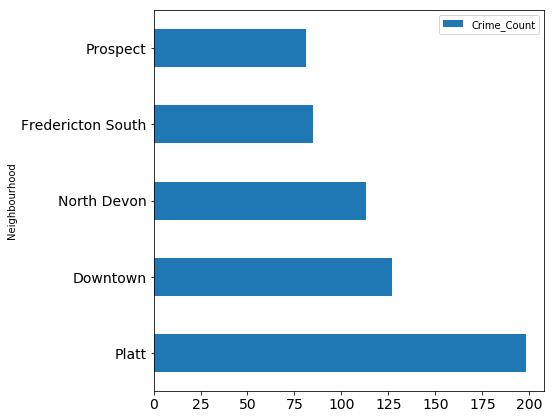

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 7, 7

ax = top_crime_count.plot.barh(x='Neighbourhood', y='Crime_Count', rot=0, fontsize=14)

### Neighbouhoods the least crime count

The following 10 neighbourhoods had the least crime count in 2017, with a crime of just crime count in each of the neighbourhoods.

In [46]:
small_crime_count = crime_data.nsmallest(10, "Crime_Count")

small_crime_count

,Neighbourhood,Crime_Count
7,Diamond Street,1
8,Doak Road,1
19,Grasse Circle,1
24,Kelly's Court Minihome Park,1
26,Knowledge Park,1
37,Nethervue Minihome Park,1
44,Regiment Creek,1
47,Saint Thomas University,1
55,Springhill,1
61,Wesbett / Case,1


#### GEOGRAPHICAL COORDINATES OF FREDERICTION

In [19]:
address = 'Fredericton, Canada'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Fredericton, New Brunswick is {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Fredericton, New Brunswick is 45.966425, -66.645813.


#### PLOT THE MAP OF FREDERICTION


In [20]:
world_geo = r'world_countries.json' # geojson file

fredericton_1_map = folium.Map(location=[45.97, -66.65], width=1000, height=750,zoom_start=10)

fredericton_1_map


In [21]:
fredericton_geo = r.json()

threshold_scale = np.linspace(crime_data['Crime_Count'].min(),crime_data['Crime_Count'].max(), 6,dtype=int)
threshold_scale = threshold_scale.tolist()
threshold_scale[-1] = threshold_scale[-1]+1

fredericton_1_map.choropleth(geo_data=fredericton_geo, data=crime_data,columns=['Neighbourhood', 'Crime_Count'],
    key_on='feature.properties.Neighbourhood', threshold_scale=threshold_scale,fill_color='YlOrRd', fill_opacity=0.7, 
    line_opacity=0.1, legend_name='Fredericton Neighbourhoods')

fredericton_1_map

#### EXAMINE THE TYPES OF CRIMES

In [22]:
crimetype_data = crime_df.groupby(['Crime_Type']).size().to_frame(name='Count').reset_index()
crimetype_data

,Crime_Type,Count
0,,4
1,ARSON,5
2,ARSON BY NEG,1
3,ARSON-DAM.PROP.,4
4,B&E NON-RESIDNCE,51
5,B&E OTHER,58
6,B&E RESIDENCE,151
7,B&E STEAL FIREAR,3
8,MISCHIEF OBS USE,1
9,MISCHIEF TO PROP,246


#### STATISTICAL DESCRIPTION OF DATAFRAME (crimetype_data)

Again, we make use of the describe( ) command to view some basic statistical details like percentile, mean, standard deviation, minimum and maximum of the pandas DataFrame (i.e., crime_data).



In [23]:
crimetype_data.describe()

,Count
count,19.000000
mean,76.842105
std,133.196706
min,1.000000
25%,2.500000
50%,5.000000
75%,60.500000
max,458.000000


#### Extract top 3 crime types with highest frequency

In [24]:
top_crime_type = crimetype_data.nlargest(5, "Count")

top_crime_type

,Crime_Type,Count
15,THEFT OTH <$5000,458
13,THEFT FROM MV < $5000,356
9,MISCHIEF TO PROP,246
6,B&E RESIDENCE,151
12,THEFT BIKE<$5000,63


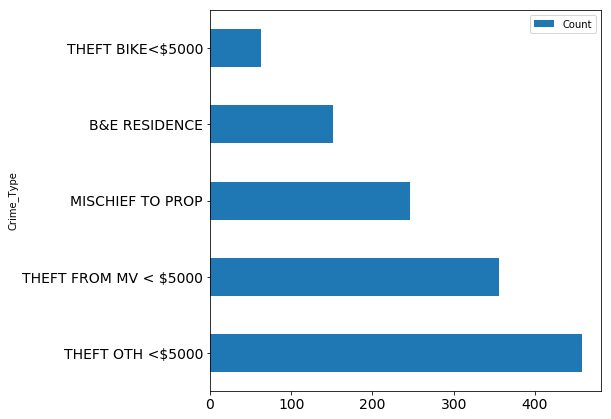

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 7, 7

ax = top_crime_type.plot.barh(x='Crime_Type', y='Count', rot=0, fontsize=14)

#### TYPES OF CRIME COUNT BY NEIGHBOURHOOD

In [26]:
crimepivot = crime_df.pivot_table(index='Neighbourhood', columns='Crime_Type', aggfunc=pd.Series.count, fill_value=0)
crimepivot


City                     \
Crime_Type                                  ARSON ARSON BY NEG   
Neighbourhood                                                    
Barkers Point                             0     0            0   
Brookside                                 0     0            0   
Brookside Estates                         0     0            0   
Brookside Mini Home Park                  0     0            0   
College Hill                              0     2            0   
Colonial heights                          0     0            0   
Cotton Mill Creek                         0     0            0   
Diamond Street                            0     0            0   
Doak Road                                 0     0            0   
Douglas                                   0     0            0   
Downtown                                  0     1            0   
Dun's Crossing                            0     0            0   
Forest Hill                               0     0            0   
Fredericton South                         1     0            0   
Fulton Heights                            0     0            0   
Garden Creek                              0     0            0   
Garden Place                              0     0            0   
Gilridge Estates                          0     0            0   
Golf Club                                 0     0            0   
Grasse Circle                             1     0            0   
Greenwood Minihome Park                   0     0            0   
Hanwell North                             0     0            0   
Heron Springs                             0     0            0   
Highpoint Ridge                           0     0            0   
Kelly's Court Minihome Park               0     0            0   
Knob Hill                                 0     0            0   
Knowledge Park                            1     0            0   
Lian / Valcore                            0     0            0   
Lincoln                                   0     0            0   
Lincoln Heights                           0     0            0   
Main Street                               0     0            0   
Marysville                                0     1            0   
McKnight                                  0     0            0   
McLeod Hill                               0     0            0   
Monteith / Talisman                       0     0            0   
Montogomery / Prospect East               0     0            0   
Nashwaaksis                               0     0            0   
Nethervue Minihome Park                   0     0            0   
North Devon                               0     0            0   
Northbrook Heights                        0     0            0   
Platt                                     0     0            0   
Poet's Hill                               0     0            0   
Prospect                                  0     0            0   
Rail Side                                 0     0            0   
Regiment Creek                            0     0            0   
Royal Road                                0     0            0   
Saint Mary's First Nation                 0     0            0   
Saint Thomas University                   0     0            0   
Sandyville                                0     0            0   
Serenity Lane                             0     0            0   
Shadowood Estates                         0     0            0   
Silverwood                                0     0            0   
Skyline Acrea                             0     1            0   
South Devon                               0     0            1   
Southwood Park                            0     0            0   
Springhill                                0     0            0   
Sunshine Gardens                          0     0            0   
The Hill                                  0     0            0   
The Hugh John

#### PLOT OF THE PROPORTION OF CRIME TYPES

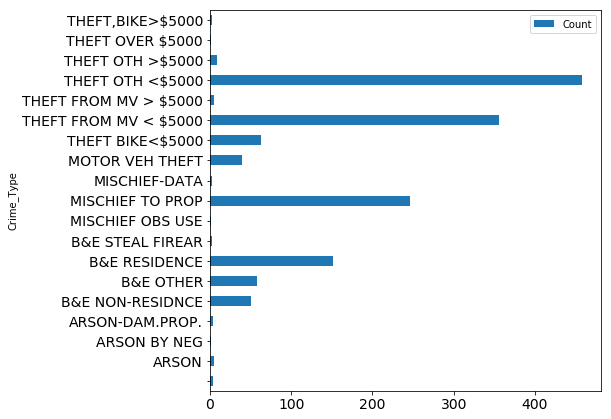

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 7, 7

crimetype_data.plot(x='Crime_Type', y='Count', kind='barh',fontsize=14 )

#### EXAMINE SPECIFIC LOCATIONS IN FREDERICTION

In [28]:
location_df = pd.read_csv('Fredericton_Locations.csv')
location_df


,Location,Latitude,Longitude
0,Knowledge Park,45.931143,-66.652700
1,Fredericton Downtown,45.963026,-66.383550
2,Fredericton Hill,45.948512,-66.656045
3,Nashwaaksis,45.983382,-66.644856
4,University of New Brunswick,45.948121,-66.641406
5,Devon,45.968802,-66.622738
6,New Maryland,45.892795,-66.683673
7,Marysville,45.978913,-66.589491
8,Skyline Acres,45.931827,-66.640339
9,Hanwell,45.902315,-66.755113


#### EXPLORE FREDERICTION NEIGHBOURHOODS

#### Define Foursquare Credentials and Version 

In [32]:
CLIENT_ID = 'This-Is-Secret-1' # your Foursquare ID
CLIENT_SECRET = 'This-Is-Secret-2' # your Foursquare Secret
VERSION = '20190311' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: This-Is-Secret-1
CLIENT_SECRET:This-Is-Secret-2


#### EXPLORE NEARBY VENUES

In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,            
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Location', 
                  'Location Latitude', 
                  'Location Longitude', 
                  'Venue',
                  'Venue id',                
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'        
                   ]
    
    return(nearby_venues)

In [31]:
fredericton_data_venues = getNearbyVenues(names=location_df['Location'],
                                   latitudes=location_df['Latitude'],
                                   longitudes=location_df['Longitude']
                                  )

Knowledge Park
Fredericton Downtown
Fredericton Hill
Nashwaaksis
University of New Brunswick
Devon
New Maryland
Marysville
Skyline Acres
Hanwell


In [33]:
print(fredericton_data_venues.shape)
fredericton_data_venues

(104, 8)


,Location,Location Latitude,Location Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
0,Knowledge Park,45.931143,-66.652700,Costco Wholesale,4e18ab92183880768f43bff6,45.927034,-66.663447,Warehouse Store
1,Knowledge Park,45.931143,-66.652700,PetSmart,4bbca501a0a0c9b6078f1a0f,45.929768,-66.659939,Pet Store
2,Knowledge Park,45.931143,-66.652700,Montana's,4e50406e62844166699b0780,45.931511,-66.662507,Restaurant
3,Knowledge Park,45.931143,-66.652700,Boston Pizza,4b64944af964a52041bf2ae3,45.938123,-66.660037,Sports Bar
4,Knowledge Park,45.931143,-66.652700,Michaels,4c489858417b20a13b82e1a9,45.929965,-66.659548,Arts & Crafts Store
5,Knowledge Park,45.931143,-66.652700,Alcool NB Liquor,4b77335df964a5202c872ee3,45.930680,-66.664180,Liquor Store
6,Knowledge Park,45.931143,-66.652700,Best Buy,5520124a498e0467bb6e81c8,45.937673,-66.660380,Electronics Store
7,Knowledge Park,45.931143,-66.652700,Wal-Mart,4bad313ff964a5208c373be3,45.934081,-66.663539,Big Box Store
8,Knowledge Park,45.931143,-66.652700,Booster Juice,4c42414e520fa59334f9caac,45.935198,-66.663602,Smoothie Shop
9,Knowledge Park,45.931143,-66.652700,Dairy Queen,4b86f05bf964a52009a731e3,45.938004,-66.659442,Fast Food Restaurant


In [34]:
print('There are {} unique venue categories.'.format(len(fredericton_data_venues['Venue Category'].unique())))

There are 56 unique venue categories.


In [35]:
print('There are {} unique venues.'.format(len(fredericton_data_venues['Venue id'].unique())))

There are 101 unique venues.


END OF NOTEBOOK